In [48]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [120]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
import matplotlib.patches
import matplotlib.lines
import matplotlib.colors
matplotlib.rcParams["figure.dpi"] = 150

import numpy as np
np.set_printoptions(precision=4, suppress=True)

import sys
sys.path.append("..")
from encoder_learning_benchmarks import \
    optimizers, common, datasets, networks, rules, benchmark, positive_definite_matrix

In [53]:
def plot_gaussian(ax, mu, cov=None, theta=None, plot_cross=True, **kwargs):
    assert (cov is None) != (theta is None)
    if cov is None:
        cov_inv = positive_definite_matrix.PositiveDefiniteMatrix(len(mu), linlog=False)(theta)[0]
        cov = np.linalg.inv(cov_inv)
    Λ, V = np.linalg.eigh(cov)
    σ0 = np.sqrt(Λ[0])
    σ1 = np.sqrt(Λ[1])
    angle_rad = np.arctan2(V[1, 0], V[0, 0])
    angle = angle_rad / np.pi * 180.0

    ellipse = matplotlib.patches.Ellipse(np.copy(mu), 2.0 * σ0, 2.0 * σ1, angle, fill=False, **kwargs)
    ax.add_patch(ellipse)
    if "linewidth" in kwargs:
        kwargs["linewidth"] *= 0.5
    else:
        kwargs["linewidth"] = 0.75
    if plot_cross:
        ax.plot([mu[0] - σ0 * np.cos(angle_rad),
                 mu[0] + σ0 * np.cos(angle_rad)],
                [mu[1] - σ0 * np.sin(angle_rad),
                 mu[1] + σ0 * np.sin(angle_rad)], **kwargs)
        ax.plot([mu[0] + σ1 * np.sin(angle_rad),
                 mu[0] - σ1 * np.sin(angle_rad)],
                [mu[1] - σ1 * np.cos(angle_rad),
                 mu[1] + σ1 * np.cos(angle_rad)], **kwargs)

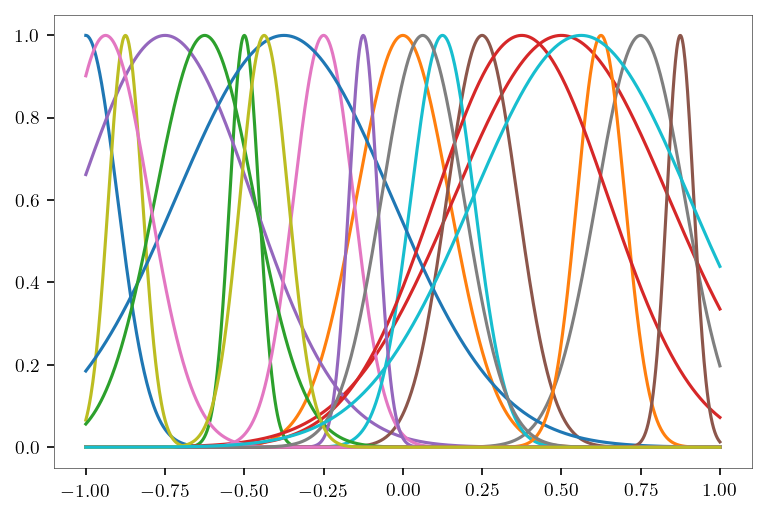

In [110]:
xs = np.linspace(-1, 1, 1000)
net = networks.rbf.manifest.ctor(
    n_dim_in=1, n_dim_hidden=20,
    radius=1.0, initialisation="halton")
fig, ax = plt.subplots()
ax.plot(xs, net.activities(xs));

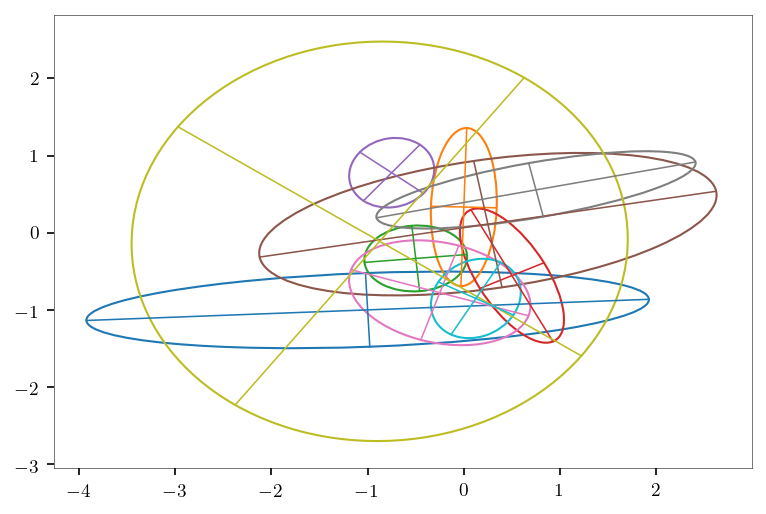

In [116]:
net = networks.rbf.manifest.ctor(
    n_dim_in=2, n_dim_hidden=100,
    radius=1.0, initialisation="halton")
fig, ax = plt.subplots()
for i in range(net.n_dim_hidden):
    color = cm.get_cmap('tab10')((i % 10) / 10)
    plot_gaussian(ax, mu=net.mus[i], theta=net.thetas[i], color=color)

In [133]:
net = networks.rbf.manifest.ctor(
    n_dim_in=2, n_dim_hidden=3,
    radius=1.0, initialisation="halton")

xs = np.random.uniform(-1, 1, (5, 2))
J = net.jacobian(xs)
J_ref = net.do_numerical_jacobian(xs, eta=1e-6)
for key in J.keys():
    print(J[key] - J_ref[key])

[[[-0. -0.]
  [-0.  0.]
  [ 0. -0.]]

 [[-0. -0.]
  [-0. -0.]
  [ 0.  0.]]

 [[-0. -0.]
  [ 0. -0.]
  [ 0.  0.]]

 [[ 0. -0.]
  [ 0.  0.]
  [-0.  0.]]

 [[-0. -0.]
  [-0.  0.]
  [-0.  0.]]]
[[[ 0. -0. -0.]
  [ 0. -0. -0.]
  [ 0.  0. -0.]]

 [[-0. -0. -0.]
  [-0.  0. -0.]
  [-0. -0.  0.]]

 [[-0. -0. -0.]
  [ 0.  0. -0.]
  [-0.  0. -0.]]

 [[-0. -0. -0.]
  [ 0. -0. -0.]
  [ 0.  0.  0.]]

 [[-0. -0. -0.]
  [-0. -0.  0.]
  [ 0. -0. -0.]]]
